## Data Description and Preprocessing

In [84]:
# Import Statements
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')

### Read the movie conversations, lines and characters from the local system

In [85]:
conversation_df = pd.read_csv('movie_conversations.tsv',encoding='ISO-8859-2', sep='\t',warn_bad_lines =False,header=None)
lines_df = pd.read_csv('movie_lines.tsv',sep='\t',error_bad_lines=False,warn_bad_lines =False,header=None)
characters_df = pd.read_csv('movie_characters_metadata.tsv',sep='\t',warn_bad_lines =False,error_bad_lines=False,header=None)


### Dataset Information
----------------------------------------------------

##### Sample of  read characterset

In [86]:
print("Characters Dataset : \n")
characters_df.columns=['charId','charName','movieId','movieName','gender','positionInCredits']
characters_df.head(5)

Characters Dataset : 



,charId,charName,movieId,movieName,gender,positionInCredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


##### Sample of read conversations

In [87]:
print("Conversations Dataset : ")
conversation_df.columns = ['charId1', 'charId2', 'movieName', 'lineId']
conversation_df.head(5)

Conversations Dataset : 


,charId1,charId2,movieName,lineId
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


##### Sample of read lines

In [88]:
print("Lines dataset : ")
lines_df.columns = ['lines', 'charId','movieId', 'charName', 'dialogue']
lines_df.head(5)

Lines dataset : 


,lines,charId,movieId,charName,dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


#### Sample of final processable dataset

In [89]:
merged_df = pd.merge(lines_df, characters_df, how='inner', on=['charId','movieId','charName'],
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
merged_df.head()

,lines,charId,movieId,charName,dialogue,movieName,gender,positionInCredits
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,f,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,f,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,f,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,f,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,f,4


In [90]:
merged_df.dropna(how='any', inplace=True)

### N-Gram Processing for "Jack"
____________________________

In [91]:
dialogues = merged_df.dialogue 
from itertools import compress

def getDialogues(merged_df, char_name):
    # get list of booleans corresponding to the Character
  ### N-Gram Processing for "Jack"
    char_line_bool = (merged_df[['charName']] == char_name)
    char_line_bool = char_line_bool['charName'].tolist()
    char_lines = list(compress(merged_df['dialogue'], char_line_bool))
    return char_lines

In [92]:
# to find the characters with most dialogues-->
merged_df.charName.value_counts()[:10]

JACK      2874
JOE       1878
GEORGE    1690
FRANK     1489
SAM       1463
HARRY     1448
NICK      1422
JOHN      1388
PETER     1357
ANNIE     1218
Name: charName, dtype: int64

#### generic function takes in input tokens and returns ngrams

In [93]:
from nltk.util import ngrams
def make_ngrams(sentence):
    ngrams2 = list(ngrams(sentence, 2))
    return ngrams2

#### Processing N-grams for a Single Character "Jack" which had the most dialogues

In [94]:
char_name = "JACK"

In [95]:
char_dialogues = getDialogues(merged_df, "JACK")

##### Sample dialogues obtained for character "JACK"

In [96]:
char_dialogues[:10] 

['That was me.',
 "You can't buy Wade off.",
 'Shit! What are we gonna do?',
 "Lawyer? I don't need no lawyer do I?",
 'Not exactly. I mean he never paid me.',
 "Nope. Heard it. We wasn't far apart. I spotted this buck then I heard the gun go off and Twombley was gone. I looked over the little cliff we was using for a stand and there the fucker was deader'n shit. Called it right in.",
 'Yeah.',
 'You heard the news.',
 "Fresh tracks.  Deer shit. Big one. Here's your buck Mr. Twombley. I'll circle around.",
 'Deers have ears too.']

In [97]:
char_cul_sentence = " ".join(char_dialogues)

In [98]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
char_final_tokens = tknzr.tokenize(char_cul_sentence)

In [99]:
for i in range(100):
    ng = make_ngrams(char_final_tokens)

#### Frequency Distribution of N-grams obtained for character "Jack"

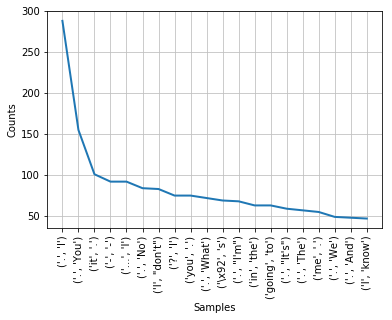

In [100]:
fdist = nltk.FreqDist(ng)
fdist.plot(20, cumulative=False)

##### Least frequent characters used by character "Jack"

In [101]:
fdist.most_common()[-10:]

[(('good', 'hundred'), 1),
 (('hundred', 'and'), 1),
 (('and', 'eighty'), 1),
 (('eighty', 'degrees'), 1),
 (('degrees', '.'), 1),
 (('a', 'walk'), 1),
 (('walk', 'for'), 1),
 (('for', 'Chrissakes'), 1),
 (('Chrissakes', '.'), 1),
 (('Good', 'call'), 1)]

##### Most Frequent words used by character "Jack"

In [102]:
fdist.most_common()[:10]

[(('.', 'I'), 288),
 (('.', 'You'), 155),
 (('it', '.'), 101),
 (('-', '-'), 92),
 (('...', 'I'), 92),
 (('.', 'No'), 84),
 (('I', "don't"), 83),
 (('?', 'I'), 75),
 (('you', '.'), 75),
 (('.', 'What'), 72)]

### N-Gram Processing for all the characters in the database
____________________________

In [103]:
dialogues = merged_df.dialogue

#### Sample of dialogueset obtained

In [104]:
dialogues[:10]

0                                         They do not!
1                                           I hope so.
2                                            Let's go.
3       Okay -- you're gonna need to learn how to lie.
4                     Like my fear of wearing pastels?
5                                     What good stuff?
6    Me.  This endless ...blonde babble. I'm like b...
7                          do you listen to this crap?
8                                                  But
9                                           Well no...
Name: dialogue, dtype: object

In [105]:
cul_sentence = " ".join(dialogues)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/bharathkoneti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Frequency Distribution for all the characters in the dataset

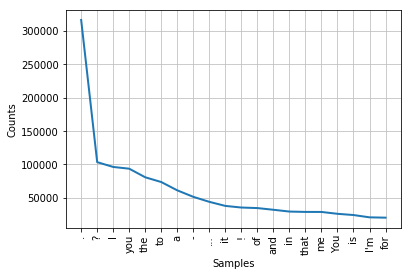

In [106]:
tknzr = TweetTokenizer()
final_tokens = tknzr.tokenize(cul_sentence)
fdist = nltk.FreqDist(final_tokens)
fdist.plot(20,cumulative=False)

#### Most frequent words in the dataset

In [107]:
fdist.most_common()[:10]

[('.', 315929),
 ('?', 103397),
 ('I', 96210),
 ('you', 93602),
 ('the', 80758),
 ('to', 73651),
 ('a', 61231),
 ('-', 51531),
 ('...', 44054),
 ('it', 37970)]

### Bigrams 

17767


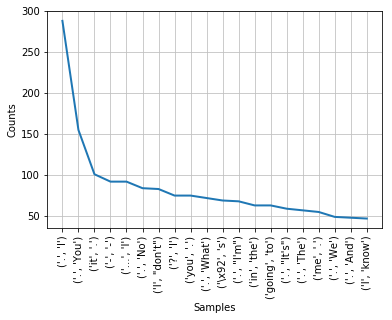

In [108]:
biCharWords = nltk.bigrams(char_final_tokens)
biFdist = nltk.FreqDist(biCharWords)
print(len(biFdist))
biFdist.plot(20, cumulative=False)

In [109]:
biFdist.most_common()[:5]

[(('.', 'I'), 288),
 (('.', 'You'), 155),
 (('it', '.'), 101),
 (('-', '-'), 92),
 (('...', 'I'), 92)]

### Tri-grams
#### Frequency Distribution 

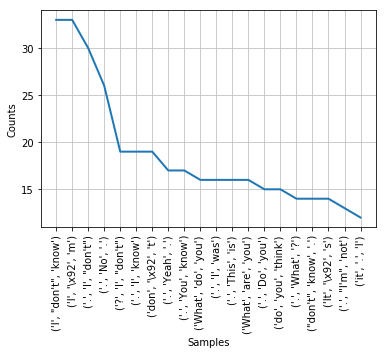

In [110]:
triCharWords = nltk.trigrams(char_final_tokens)
triFdist = nltk.FreqDist(triCharWords)
triFdist.plot(20, cumulative=False)

#### Most Common Tri-grams

In [111]:
triFdist.most_common()[:5]

[(('I', "don't", 'know'), 33),
 (('I', '\x92', 'm'), 33),
 (('.', 'I', "don't"), 30),
 (('.', 'No', '.'), 26),
 (('?', 'I', "don't"), 19)]